<a href="https://colab.research.google.com/github/Sai-git-coder/Coffee_Revenue_Insights/blob/main/Coffee_Revenue_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coffee Revenue Insights**

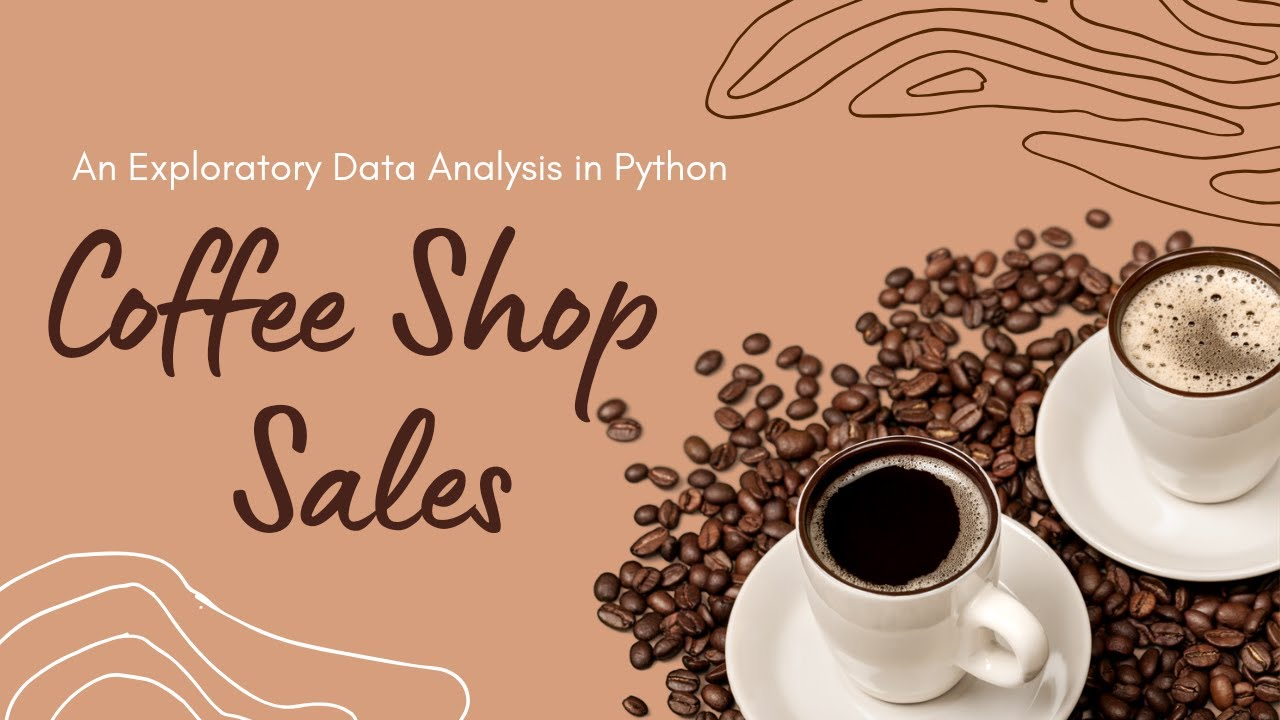

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Coffee Shop Sales.csv",encoding='latin1')
df.head()

,ï»¿transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01-01-2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
df.tail()

,ï»¿transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,30-06-2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30-06-2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30-06-2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30-06-2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,30-06-2023,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [6]:
df.shape

(149116, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ï»¿transaction_id  149116 non-null  int64  
 1   transaction_date   149116 non-null  object 
 2   transaction_time   149116 non-null  object 
 3   transaction_qty    149116 non-null  int64  
 4   store_id           149116 non-null  int64  
 5   store_location     149116 non-null  object 
 6   product_id         149116 non-null  int64  
 7   unit_price         149116 non-null  float64
 8   product_category   149116 non-null  object 
 9   product_type       149116 non-null  object 
 10  product_detail     149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [8]:
# checking for nulls
df.isnull().sum()

,0
ï»¿transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [9]:
# dropping "product_id" and "store_id"
df.drop(columns = ["store_id", "product_id"], inplace = True)
df.head()

,ï»¿transaction_id,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01-01-2023,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [10]:
# check duplicated rows
df.duplicated().any()

False

In [20]:
# rename columns
df.rename(columns = {'ï»¿transaction_id': 'id',
                     'transaction_date': 'date',
                     'transaction_time': 'time',
                     'transaction_qty': 'quantity',
                     'store_location': 'location',
                     'product_category': 'category',
                     'product_type': 'product',
                     'product_detail': 'detail'}, inplace = True)
df.head()

,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,1,2023,Sunday,7,Morning
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,1,2023,Sunday,7,Morning
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,1,2023,Sunday,7,Morning
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning


In [22]:
# converting date to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
# sales
df['sales'] = df['quantity'] * df['unit_price']
df.head()

,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,1,2023,Sunday,7,Morning
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,1,2023,Sunday,7,Morning
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,1,2023,Sunday,7,Morning
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning


In [23]:
# extract the month as a full name
df['month'] = df['date'].dt.strftime('%B')
# extract the day and year
df['day'] = df['date'].dt.day
df.head()

,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,1,2023,Sunday,7,Morning
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,1,2023,Sunday,7,Morning
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,1,2023,Sunday,7,Morning
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning


In [24]:
df['year'] = df['date'].dt.year
# get the weekday name
df['weekday'] = df['date'].dt.day_name()
df.head()

,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,1,2023,Sunday,7,Morning
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,1,2023,Sunday,7,Morning
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,1,2023,Sunday,7,Morning
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning


In [25]:
# extracting the hour from time
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
# defining the time of the day
def get_time_of_day(hour):
    if hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'
df['time_of_day'] = df['hour'].apply(get_time_of_day)

In [26]:
df.head()

,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,1,2023,Sunday,7,Morning
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,1,2023,Sunday,7,Morning
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,1,2023,Sunday,7,Morning
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning


In [27]:
df.to_csv('cleaned_coffee_sales_dataset.csv')

# **Exploratory Data Analysis**

In [28]:
palette = sns.set_palette(sns.color_palette("RdBu"))

## **Total Revenue**

In [29]:
# Calculate total revenue
df['revenue'] = df['quantity'] * df['unit_price']
total_revenue = df['revenue'].sum()
print(f"Total Revenue: Rs {total_revenue}")


Total Revenue: Rs 698812.3300000002


##**Total Orders**

In [30]:
# prompt: calculate total orders

total_orders = df['id'].nunique()
print(f"Total Orders: {total_orders}")


Total Orders: 149116


##**Average Order Value (AOV)**

In [31]:
# prompt: calculate Average Order Value (AOV)

# Calculate Average Order Value (AOV)
aov = total_revenue / total_orders
print(f"Average Order Value: Rs {aov}")


Average Order Value: Rs 4.686367190643527


##**Peak Sales Location & Revenue**

In [32]:
peak_sales_location = df.groupby('location')['unit_price'].sum().idxmax()
(f'Peak Sales Location: {peak_sales_location}')

"Peak Sales Location: Hell's Kitchen"

In [33]:
peak_sales_location_revenue = df.groupby('location')['unit_price'].sum().max()
(f'Peak Sales Location: Rs {peak_sales_location_revenue:,.2f}')

'Peak Sales Location: Rs 172,205.67'

##**Sales by Month**

In [34]:
# Sum of sales for each Month
revenue = df.groupby('month')['unit_price'].sum().reset_index()
revenue

,month,unit_price
0,April,85709.58
1,February,55134.34
2,January,59018.04
3,June,119571.08
4,March,71833.08
5,May,113076.91


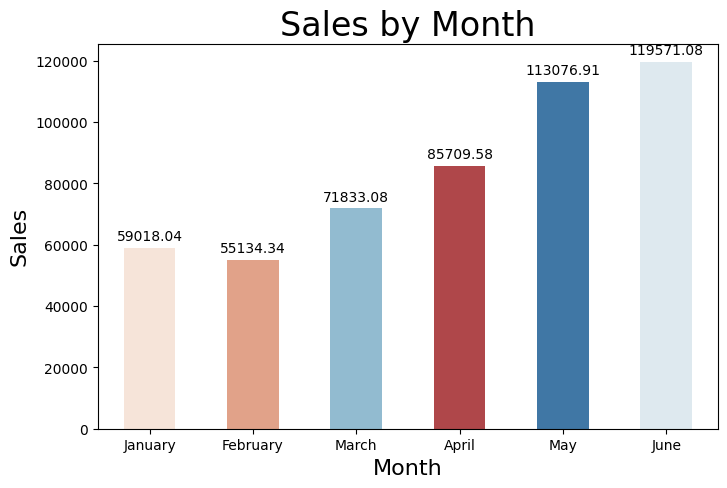

In [35]:
plt.figure(figsize=(8, 5))
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
# Create the barplot
ax = sns.barplot(data = revenue, x = 'month', y = 'unit_price', hue = 'month', order = month_order, errorbar = None, width=0.5)
# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)  # Format to 2 decimal places
plt.title('Sales by Month', fontsize = 24)
plt.xlabel('Month',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)
plt.show()

##**Sales by Location**

In [36]:
# Sum of sales for each location
location_revenue = df.groupby('location')['sales'].sum().reset_index()
location_revenue

,location,sales
0,Astoria,232243.91
1,Hell's Kitchen,236511.17
2,Lower Manhattan,230057.25


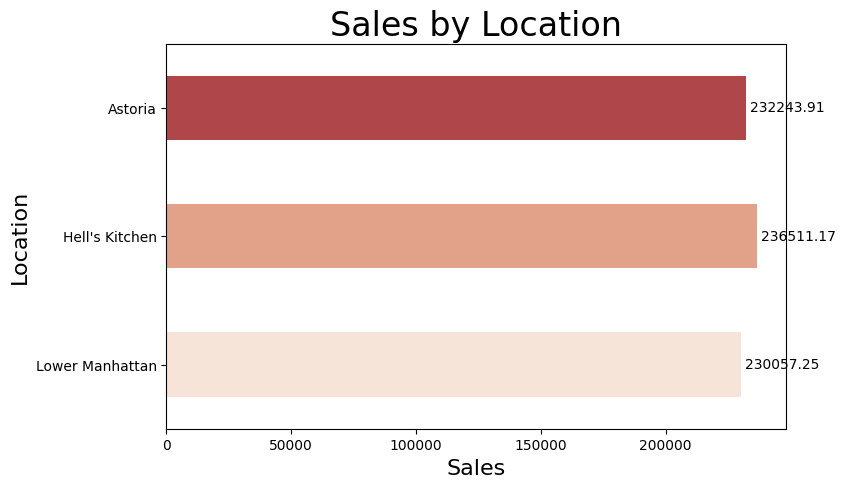

In [37]:
plt.figure(figsize=(8,5))
# Create a barplot
ax = sns.barplot(data = location_revenue, y = 'location', x = 'sales', hue = 'location', errorbar = None, width=0.5)
# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)  # Format to 2 decimal places
plt.title('Sales by Location', fontsize = 24)
plt.ylabel('Location',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.show()

##**Top 10 Popular Product by Revenue**

In [39]:
product_revenue = df.groupby('product')['sales'].sum().reset_index()
product_revenue

,product,sales
0,Barista Espresso,91406.20
1,Biscotti,19793.53
2,Black tea,2711.85
3,Brewed Black tea,47932.00
4,Brewed Chai tea,77081.95
5,Brewed Green tea,23852.50
6,Brewed herbal tea,47539.50
7,Chai tea,4301.25
8,Clothing,6163.00
9,Drinking Chocolate,2728.04


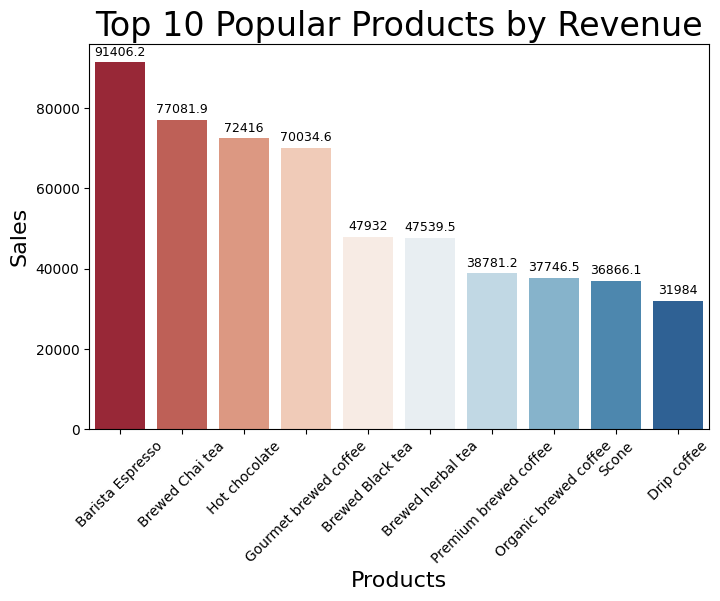

In [40]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(x = 'product', y = 'sales', hue='product', palette='RdBu', data = product_revenue.sort_values('sales', ascending = False)[0:10])
# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=3) # Format to 2 decimal places
# x-axis rotation
plt.xticks(rotation=45)
plt.title('Top 10 Popular Products by Revenue', fontsize = 24)
plt.xlabel('Products',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)
plt.show()

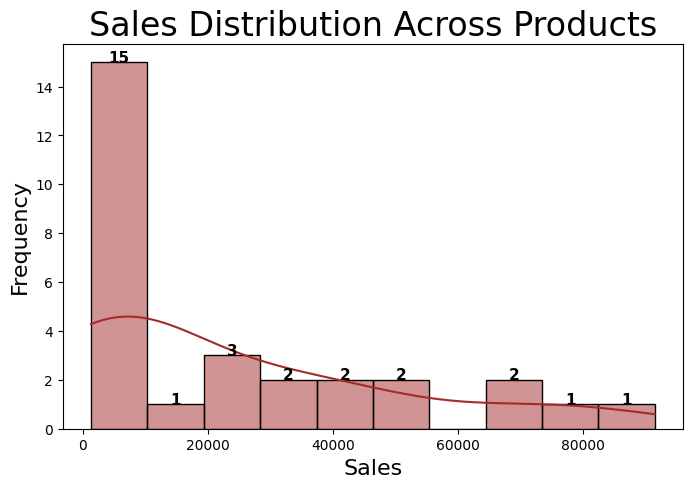

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Create histogram for sales distribution
ax = sns.histplot(data=product_revenue, x='sales', bins=10, kde=True, color='brown', edgecolor='black')

# Add data labels on top of bins
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only label bins with data
        ax.text(patch.get_x() + patch.get_width()/2, height, f'{int(height)}',
                ha='center', fontsize=11, fontweight='bold', color='black')

# Labels and title
plt.title('Sales Distribution Across Products', fontsize=24)
plt.xlabel('Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()


##**Average Order Value (AOV) by Product Category**

In [42]:
category_aov = df.groupby('category')['sales'].mean().reset_index()
category_aov

,category,sales
0,Bakery,3.610969
1,Branded,18.215529
2,Coffee,4.621207
3,Coffee beans,22.866657
4,Drinking Chocolate,6.314615
5,Flavours,1.238409
6,Loose Tea,9.267438
7,Packaged Chocolate,9.050595
8,Tea,4.321458


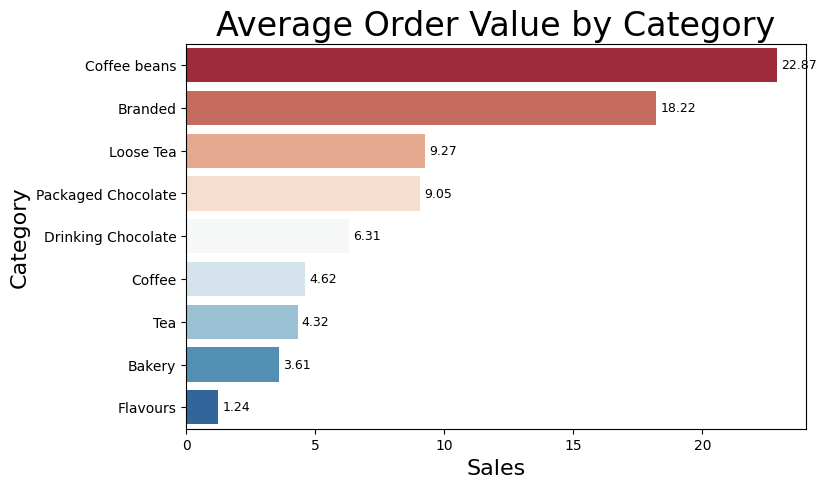

In [43]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(x = 'sales', y = 'category', hue = 'category', palette='RdBu', data = category_aov.sort_values('sales', ascending = False))
# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)  # Format to 2 decimal places
plt.title('Average Order Value by Category', fontsize = 24)
plt.xlabel('Sales',fontsize = 16)
plt.ylabel('Category',fontsize = 16)
plt.show()

##**Popular Category**

In [44]:
# count of category
category_count = df['category'].value_counts().reset_index()
category_count

,category,count
0,Coffee,58416
1,Tea,45449
2,Bakery,22796
3,Drinking Chocolate,11468
4,Flavours,6790
5,Coffee beans,1753
6,Loose Tea,1210
7,Branded,747
8,Packaged Chocolate,487


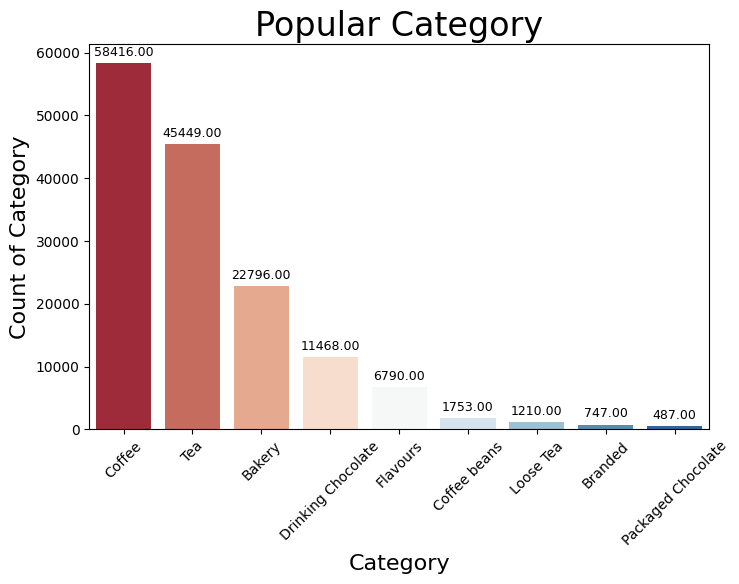

In [45]:
plt.figure(figsize = (8,5))
ax = sns.barplot(data = category_count, y = 'count', x = 'category', hue = 'category', palette='RdBu')
# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)  # Format to 2 decimal places
plt.title('Popular Category', fontsize = 24)
plt.ylabel('Count of Category',fontsize = 16)
plt.xlabel('Category',fontsize = 16)
plt.xticks(rotation=45)
plt.show()

##**Peak Hour**

In [46]:
order_per_hour = df.groupby('hour')['id'].count().reset_index()
order_per_hour

,hour,id
0,6,4594
1,7,13428
2,8,17654
3,9,17764
4,10,18545
5,11,9766
6,12,8708
7,13,8714
8,14,8933
9,15,8979


In [47]:
# rename columns
order_per_hour.rename(columns = {'id':'count_of_orders'}, inplace = True)

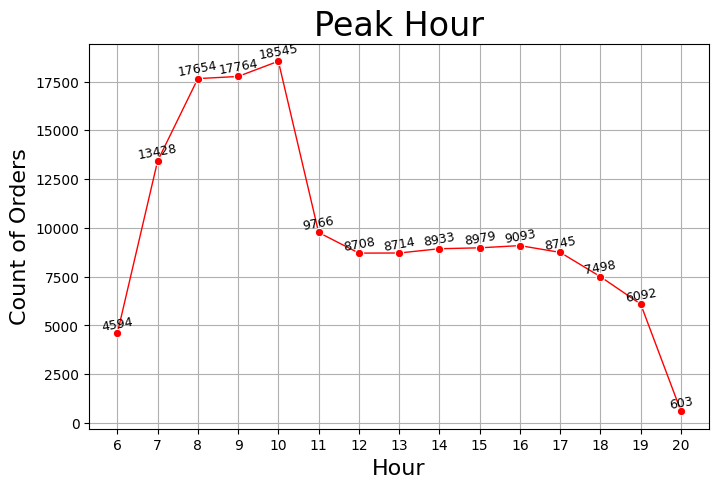

In [48]:
plt.figure(figsize = (8,5))
sns.lineplot(x = 'hour', y = 'count_of_orders', data = order_per_hour, marker='o', linewidth=1, color='red')
# Add data labels
for x, y in zip(order_per_hour['hour'], order_per_hour['count_of_orders']):
    plt.text(x, y, f'{y}', fontsize=9, ha='center', va='bottom', color='black', fontweight='light', rotation=10)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Count of Orders', fontsize=16)
plt.title('Peak Hour', fontsize = 24)
# Set the x-axis limits to the min and max values of 'hour'
plt.xticks(range(order_per_hour['hour'].min(), order_per_hour['hour'].max() + 1))
plt.grid(True)
plt.show()


##**Peak Day**

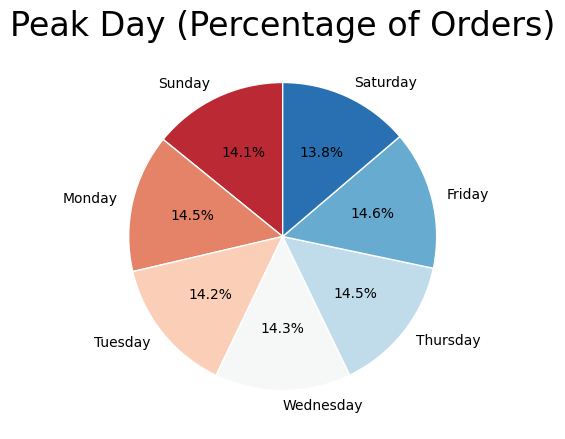

In [49]:
weekdays_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_counts = df['weekday'].value_counts().reindex(weekdays_order)
plt.figure(figsize=(8,5))
plt.pie(weekday_counts, labels=weekday_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("RdBu",len(weekday_counts)),wedgeprops={'edgecolor': 'white'})
plt.title('Peak Day (Percentage of Orders)', fontsize=24)
plt.show()


##**Distribution of orders across different coffee types**

In [50]:
coffee_type = df[df['category'] == 'Coffee'][['product']]
coffee_type

,product
0,Gourmet brewed coffee
3,Drip coffee
6,Drip coffee
7,Gourmet brewed coffee
8,Barista Espresso
...,...
149103,Organic brewed coffee
149104,Premium brewed coffee
149105,Drip coffee
149106,Gourmet brewed coffee


In [51]:
coffee_type_count = coffee_type['product'].value_counts().reset_index()
coffee_type_count

,product,count
0,Gourmet brewed coffee,16912
1,Barista Espresso,16403
2,Organic brewed coffee,8489
3,Drip coffee,8477
4,Premium brewed coffee,8135


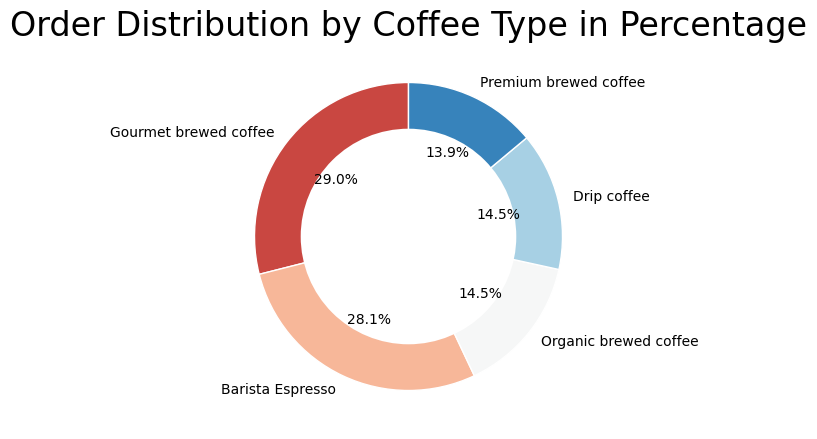

In [52]:
plt.figure(figsize=(8, 5))

# Define colors
colors = sns.color_palette("RdBu", len(coffee_type_count))

# Create a pie chart and add a circle in the middle to make it a donut
plt.pie(coffee_type_count['count'], labels=coffee_type_count['product'], autopct='%1.1f%%',
        startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})

# Add a white circle in the middle
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Order Distribution by Coffee Type in Percentage', fontsize=24)
plt.show()


# **Overview of Findings**

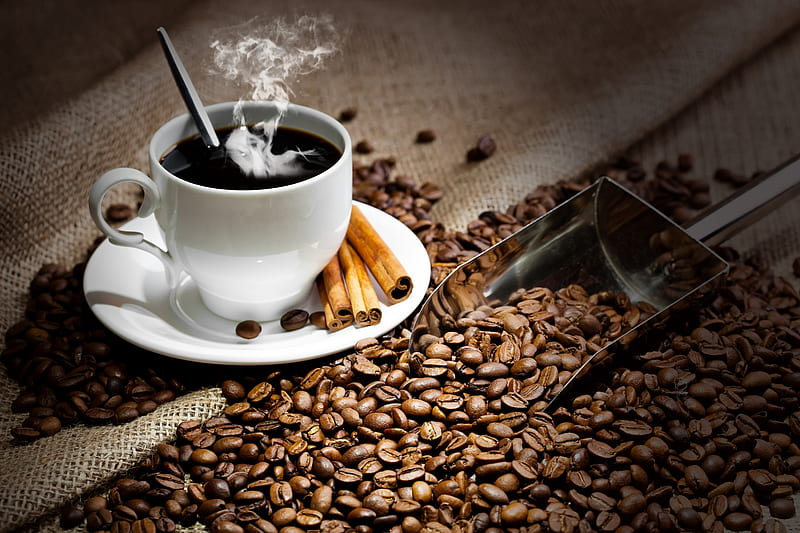


*  Total revenue of Rs 698K was generated from 149K orders, with June      being the peak month at Rs 166K.
*  Hell's Kitchen led all locations with Rs 172K in revenue.
*  Coffee Beans showed the highest AOV at Rs22.
*  Coffee emerged as the most popular category.
*  Sales peak at 10 AM, with steady performance across all weekdays.
*  Gourmet Brewed Coffee leading in popularity.





